Pour améliorer les statistiques d'un dépôt Github, il est crucial de comprendre différents aspects tels que l'engagement de la communauté, la qualité du code, la fréquence des mises à jour, etc.
Nous allons donc voir plusieurs aspects avec des graphiques et des analyses pour comprendre les statistiques d'un dépôt Github.

Pour ce faire nous allons utiliser deux csv :
- `repositories.csv` : contient des informations sur les dépôts.
- `X.csv` : contient des informations sur les commits, les problèmes, les étoiles, les fourches, etc.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [9]:
repositories = pd.read_csv('repositories.csv', parse_dates=['Created At', 'Updated At'])

# Tendance des mises à jour au fil du temps.

#### Graphique de la fréquence des mises à jour par rapport au temps (Updated At vs. Created At).

<Axes: xlabel='Updated At'>

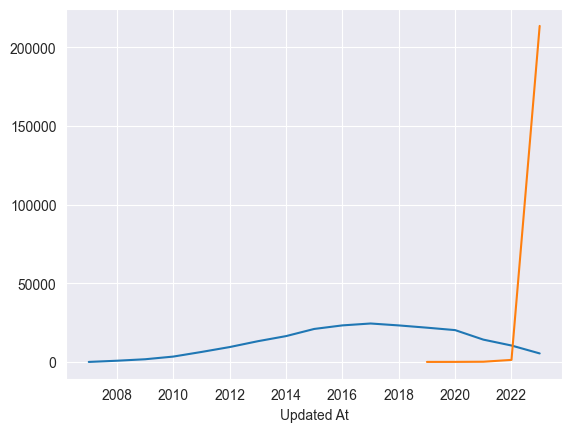

In [31]:
# Plot qui compare 'Updated At' et 'Created At' avec le nombre de repositories
repositories.groupby([repositories['Created At'].dt.year]).size().plot(kind='line')
repositories.groupby([repositories['Updated At'].dt.year]).size().plot(kind='line')

#### Graphique de la croissance de la taille du code au fil du temps.

<Axes: xlabel='Created At Year'>

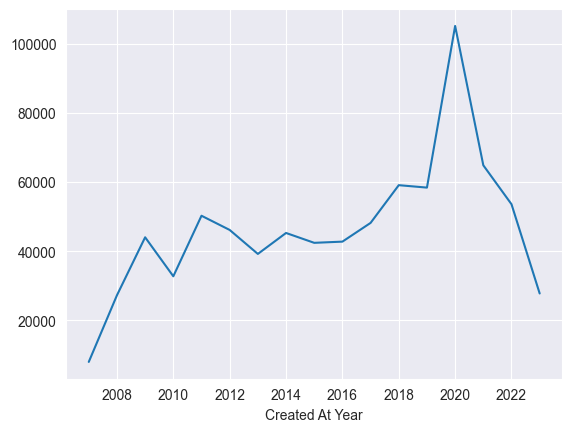

In [28]:
# Plot qui compare 'Size' et 'Created At' avec le nombre de repositories en moyenne
repositories['Created At Year'] = repositories['Created At'].dt.year
repositories.groupby('Created At Year')['Size'].mean().plot(kind='line')

# Engagement de la communauté

#### Graphique du nombre d'étoiles (Stars) et de fourches (Forks) par rapport au temps.

<Axes: xlabel='Created At'>

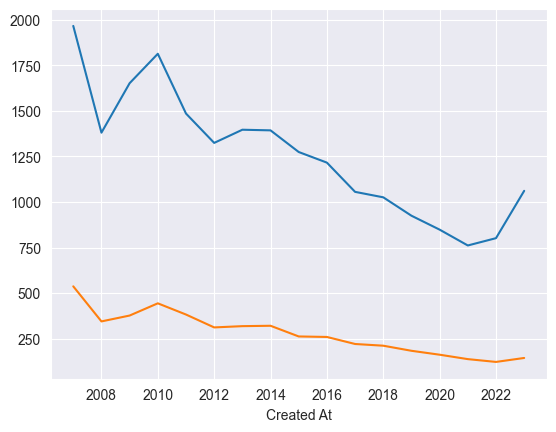

In [30]:
# Plot qui compare 'Stars' et 'Forks' avec le nombre de repositories
repositories.groupby([repositories['Created At'].dt.year])['Stars'].mean().plot(kind='line')
repositories.groupby([repositories['Created At'].dt.year])['Forks'].mean().plot(kind='line')

#### Graphique du nombre de problèmes (Issues) ouverts et fermés au fil du temps.

# Qualité du code

#### Analyse de la distribution des langages de programmation utilisés.

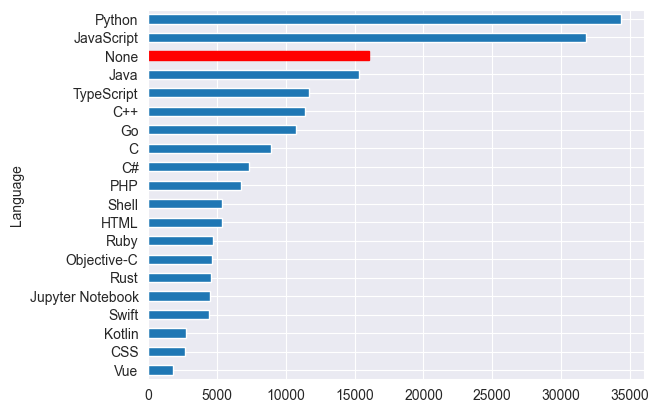

In [46]:
# Plot qui compare 'Language' avec le nombre de repositories, prend les 20 premiers langages
none_value = 'None'
repositories['Language'] = repositories['Language'].fillna(none_value)
repositories_languages = repositories.groupby('Language').size().sort_values(ascending=True).tail(20)
repositories_languages.plot(kind='barh')
# Highlight the None value
index = repositories_languages.index.get_loc(none_value)
plt.gca().get_children()[index].set_color('r')

#### Graphique de la taille moyenne des fichiers par langage de programmation.

<Axes: ylabel='Language'>

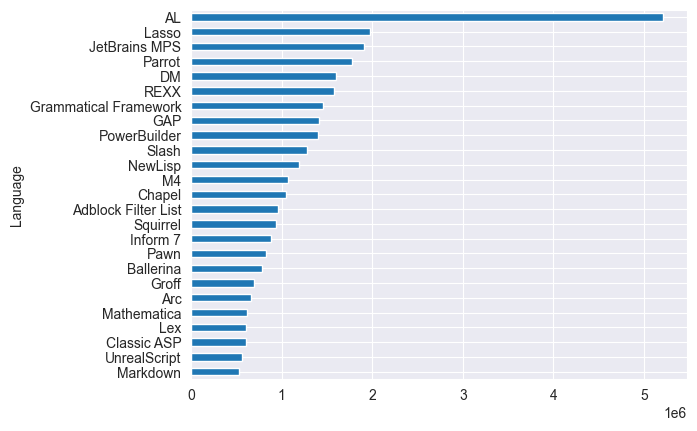

In [49]:
# Plot qui compare 'Language' et 'Size' avec le nombre de repositories
repositories.groupby('Language')['Size'].mean().sort_values(ascending=True).tail(25).plot(kind='barh')

# Relation entre différentes métriques

#### Corrélation entre le nombre d'étoiles (Stars) et le nombre de problèmes ouverts (Issues).

<Axes: xlabel='Stars', ylabel='Issues'>

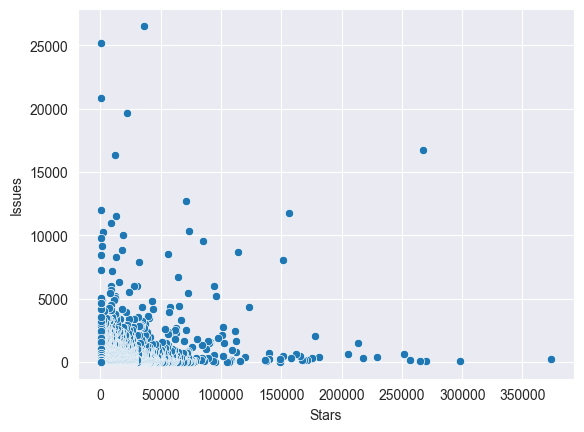

In [50]:
# Plot qui compare 'Stars' et 'Issues' avec le nombre de repositories
sns.scatterplot(data=repositories, x='Stars', y='Issues')

#### Corrélation entre la taille du code et le nombre de contributions par semaine.

ValueError: Could not interpret value `Contributors` for `y`. An entry with this name does not appear in `data`.

# Contribution des développeurs

#### Graphique des principaux contributeurs (basé sur les commits) et de leur activité au fil du temps.

#### Répartition des contributions par auteur.

# Utilisation des fonctionnalités de GitHub

#### Graphique montrant l'utilisation des wiki, des projets, des téléchargements, etc.

# Analyse comparative

#### Comparaison des métriques entre différents dépôts pour identifier les meilleures pratiques.

# Analyse de la stabilité et de la maintenance

#### Graphique du nombre de problèmes ouverts et fermés par rapport au temps pour évaluer la stabilité du projet.

#### Graphique de la distribution des branches par défaut et de leur activité.

# Analyse de l'engagement de la communauté

#### Graphique montrant le nombre de contributeurs uniques au fil du temps.

# Analyse de la documentation

#### Graphique montrant l'utilisation du wiki et de la documentation par rapport à d'autres activités.